In [2]:
import wordgraph as wg
import pandas as pd
from ggplot import * 
import numpy as np
import matplotlib.pyplot as plt
import powerlaw 
import os
%matplotlib inline
G = wg.WordGraph()

Loop through all the generated graphs and fit their degree distributions with powerlaw and other functions

In [2]:
def fit_powerlaws_to_graphs(data_dir, dataset):
    df = pd.DataFrame(columns=['dataset', 'epsilon', 'alpha', 'sigma', 
                               'pl_vs_exp_R', 'pl_vs_exp_p', 
                               'pl_vs_truncpl_R', 'pl_vs_truncpl_p'])
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if not file.startswith("."):
                G = wg.WordGraph()
                G.load_pickle(os.path.join(root, file))
                pl_result = G.fit_power_law()
                
                R1, p1 = pl_result.distribution_compare('power_law', 
                                                        "exponential")
                R2, p2 = pl_result.distribution_compare('power_law', 
                                                        "truncated_power_law")
                
                row = pd.DataFrame([[dataset, G.epsilon, pl_result.alpha, 
                                     pl_result.sigma, R1, p1, R2, p2]], 
                                   columns=['dataset','epsilon', 'alpha', 'sigma', 
                                            'pl_vs_exp_R', 'pl_vs_exp_p', 
                                            'pl_vs_truncpl_R', 'pl_vs_truncpl_p'])
                df = df.append(row, ignore_index=True)
    return df

### Fit SEEDLings Graphs

In [3]:
%%capture
seed_powerlaw_df = fit_powerlaws_to_graphs('/Volumes/Lexar/semspace_output/seedlings_all', 'seedlings')
seed_powerlaw_df.to_csv('output/seedlings_powerlaw_fits.csv')

### Fit COCA Graphs

In [4]:
%%capture
coca_powerlaw_df = fit_powerlaws_to_graphs('/Volumes/Lexar/semspace_output/coca_all', 'coca')
coca_powerlaw_df.to_csv('output/coca_powerlaw_fits.csv')

In [6]:
%%capture
wb_powerlaw_df = fit_powerlaws_to_graphs('/Volumes/Lexar/semspace_output/wordbank', 'wordbank')
wb_powerlaw_df.to_csv('output/wordbank_powerlaw_fits.csv')

In [7]:
pl_fit = seed_powerlaw_df.append([coca_powerlaw_df, wb_powerlaw_df], ignore_index=True)

## Plot alpha as a function of epsilon

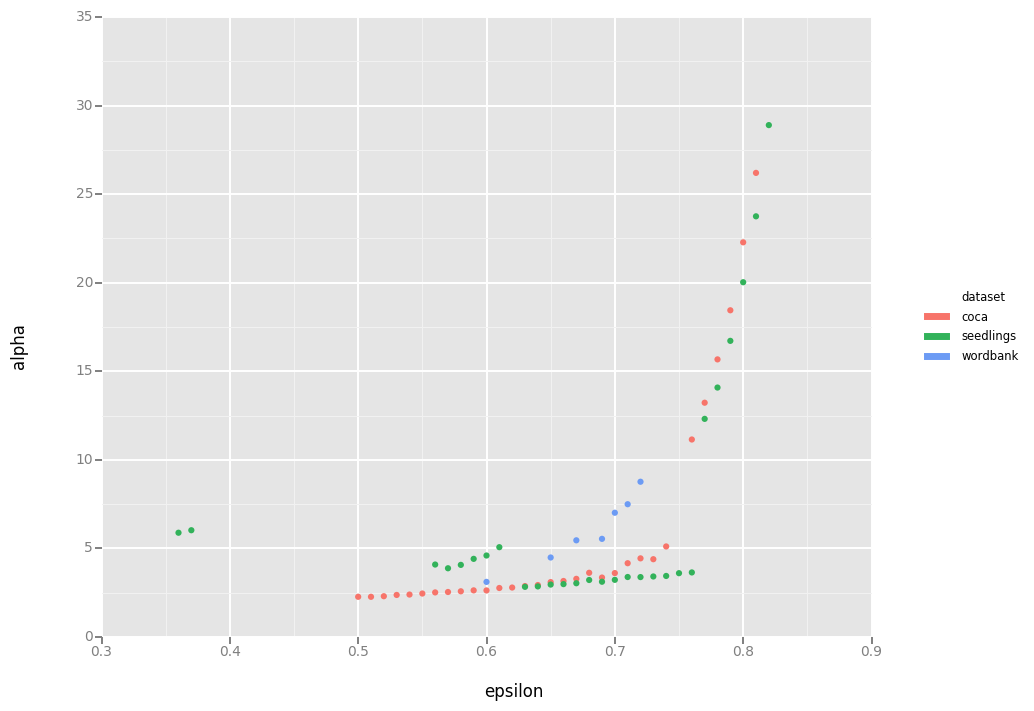

<ggplot: (-9223372036561190705)>

In [11]:
pl_fit = pl_fit.query('pl_vs_exp_R > 0 and sigma < 0.6')

ggplot(pl_fit , aes(x='epsilon', y='alpha', group='dataset', color='dataset')) +\
    geom_point()

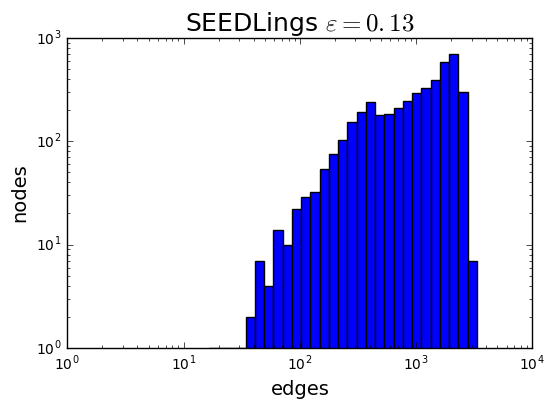

In [57]:
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_all/cos_0.13')
deg_dist = G.degree_distribution()
    
plt.hist(deg_dist.degree, bins=np.logspace(0.1, 4.0, 50))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title(r'SEEDLings $\varepsilon = 0.13$', fontsize=18)
plt.xlabel('edges', fontsize=14)
plt.ylabel('nodes', fontsize=14)
plt.savefig('graphs/seedlings_degrdist_013.png')
plt.show()

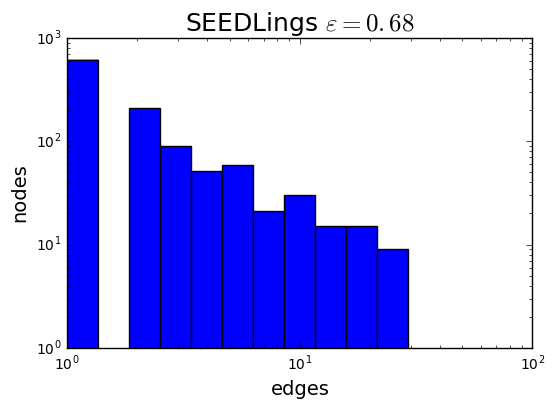

In [8]:
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_all/cos_0.68')
deg_dist = G.degree_distribution()

plt.hist(deg_dist.degree, bins=np.logspace(0, 2, 16))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title(r'SEEDLings $\varepsilon = 0.68$', fontsize=18)
plt.xlabel('edges', fontsize=14)
plt.ylabel('nodes', fontsize=14)
plt.savefig('graphs/seedlings_degrdist_068.png')
plt.show()

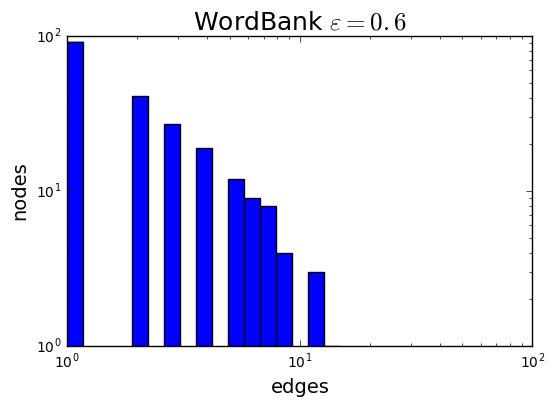

In [77]:
G.load_pickle('/Volumes/Lexar/semspace_output/wordbank/cos_0.6')
deg_dist = G.degree_distribution()

plt.hist(deg_dist.degree, bins=np.logspace(0, 2.0, 30))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title(r'WordBank $\varepsilon = 0.6$', fontsize=18)
plt.xlabel('edges', fontsize=14)
plt.ylabel('nodes', fontsize=14)
plt.savefig('graphs/wordbank_degrdist_06.png')
pl.show()

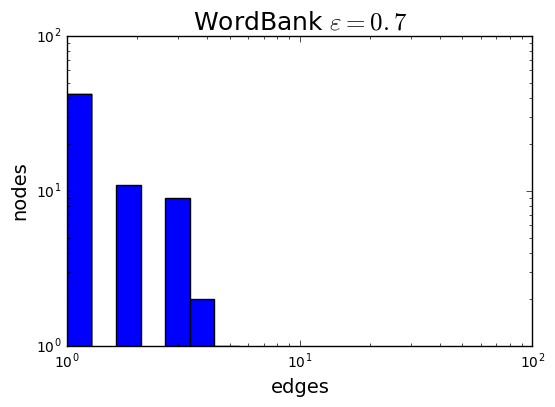

In [12]:
G.load_pickle('/Volumes/Lexar/semspace_output/wordbank/cos_0.7')
deg_dist = G.degree_distribution()

plt.hist(deg_dist.degree, bins=np.logspace(0, 2.0, 20))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title(r'WordBank $\varepsilon = 0.7$', fontsize=18)
plt.xlabel('edges', fontsize=14)
plt.ylabel('nodes', fontsize=14)
plt.savefig('graphs/wordbank_degrdist_07.png')
plt.show()

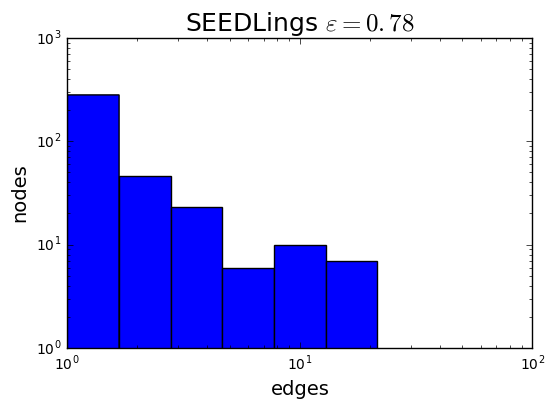

In [4]:
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_all/cos_0.78')
deg_dist = G.degree_distribution()

plt.hist(deg_dist.degree, bins=np.logspace(0, 2, 10))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title(r'SEEDLings $\varepsilon = 0.78$', fontsize=18)
plt.xlabel('edges', fontsize=14)
plt.ylabel('nodes', fontsize=14)
plt.savefig('graphs/seedlings_degrdist_078.png')
plt.show()

In [129]:
edges = np.logspace(0, 4, 35)
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_all_no_CHI/cos_0.13')
deg_dist = G.degree_distribution()
seed13_dist = np.histogram(deg_dist['degree'], bins=edges)

In [130]:
edges = np.logspace(0, 2, 19)
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_all_no_CHI/cos_0.68')
deg_dist = G.degree_distribution()
seed68_dist = np.histogram(deg_dist['degree'], bins=edges)

In [136]:
edges = np.logspace(0, 2, 12)
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_6mo_no_CHI/cos_0.66')
deg_dist = G.degree_distribution()
seed_6mo_66_dist = np.histogram(deg_dist['degree'], bins=edges)

In [149]:
edges = np.logspace(0, 2, 10)
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_1617mo_no_CHI/cos_0.63')
deg_dist = G.degree_distribution()
seed_1617mo_63_dist = np.histogram(deg_dist['degree'], bins=edges)

In [150]:
edges = np.logspace(0, 2, 16)
G.load_pickle('/Volumes/Lexar/semspace_output/wordbank/cos_0.6')
deg_dist = G.degree_distribution()
wb6_dist = np.histogram(deg_dist['degree'], bins=edges)

In [151]:
df = pd.DataFrame()

s13_data = {'distr': "seedlings_013", "n": seed13_dist[0], "k": seed13_dist[1][1:]}
seed_13 = pd.DataFrame(data=s13_data, columns=["distr","n", "k"])

s_6mo_66_data = {'distr': "seedlings_6mo_066", "n": seed_6mo_66_dist[0], "k": seed_6mo_66_dist[1][1:]}
seed_6mo_66 = pd.DataFrame(data=s_6mo_66_data, columns=["distr","n", "k"])

s_1617mo_63_data = {'distr': "seedlings_1617mo_063", "n": seed_1617mo_63_dist[0], "k": seed_1617mo_63_dist[1][1:]}
seed_1617mo_63 = pd.DataFrame(data=s_1617mo_63_data, columns=["distr","n", "k"])

s68_data = {'distr': "seedlings_068", "n": seed68_dist[0], "k": seed68_dist[1][1:]}
seed_68 = pd.DataFrame(data=s68_data, columns=["distr","n", "k"])

wb6_data = {'distr': "wordbank_060", "n": wb6_dist[0], "k": wb6_dist[1][1:]}
wb_06 = pd.DataFrame(data=wb6_data, columns=["distr","n", "k"])


df = df.append([seed_13, seed_68, seed_6mo_66, seed_1617mo_63, wb_06])
df.to_csv("output/degree_dist.csv", index=False)

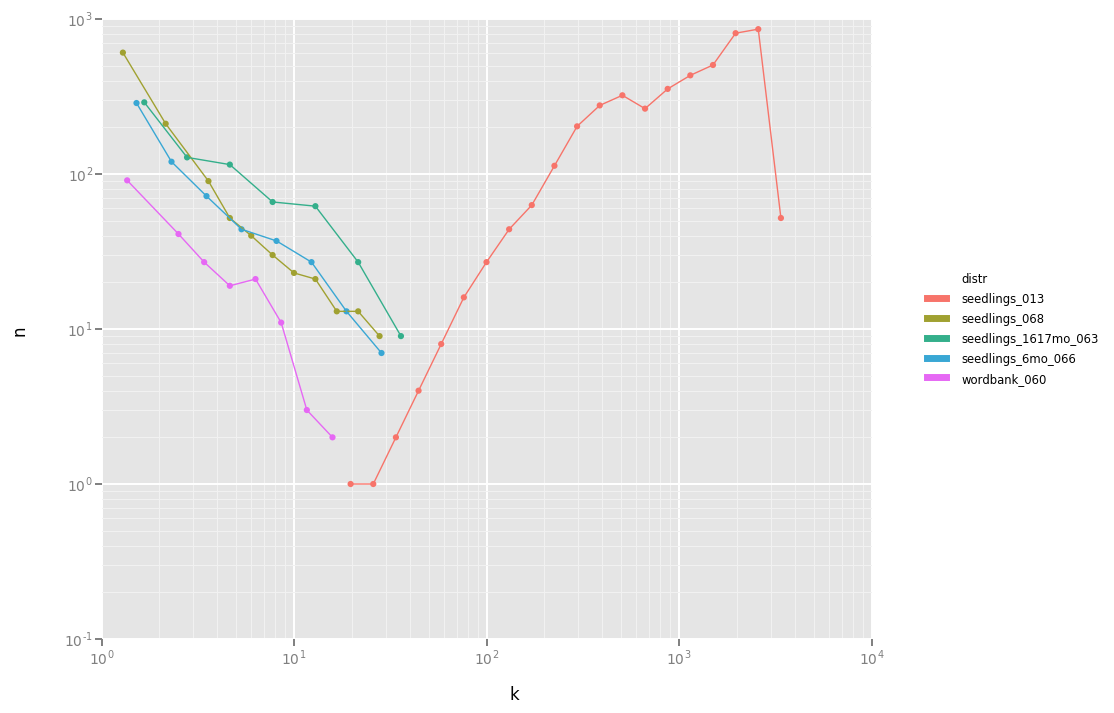

<ggplot: (283258979)>

In [152]:
ggplot(df.query('n > 0'), aes(x='k', y='n', color='distr')) +\
    geom_point()+\
    geom_line()+\
    scale_x_log()+\
    scale_y_log()

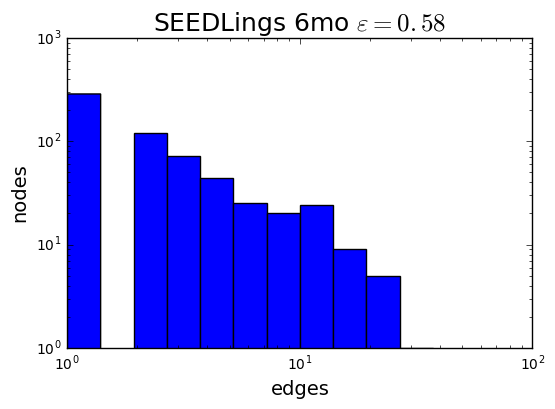

In [72]:
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_6mo_no_CHI/cos_0.66')
deg_dist = G.degree_distribution()

plt.hist(deg_dist.degree, bins=np.logspace(0, 2, 15))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title(r'SEEDLings 6mo $\varepsilon = 0.58$', fontsize=18)
plt.xlabel('edges', fontsize=14)
plt.ylabel('nodes', fontsize=14)
plt.savefig('graphs/seedlings_6mo_degrdist_058.png')
plt.show()